# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    """
    Apply SVD-like dimensionality reduction using eigendecomposition.
    
    Parameters:
        X_train (np.ndarray): Training data.
        X_test (np.ndarray): Test data.
        n_components (int): Number of components to keep.
        
    Returns:
        X_train_reduced (np.ndarray): Transformed training data.
        X_test_reduced (np.ndarray): Transformed test data.
    """
    # Step 1: Centering the data
    X_train_centered = X_train - np.mean(X_train, axis=0)
    X_test_centered = X_test - np.mean(X_test, axis=0)
    
    # Step 2: Compute covariance matrix
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / (X_train_centered.shape[0] - 1)
    
    # Step 3: Eigen decomposition of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Step 4: Sort eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    global V_reduced
    V_reduced = sorted_eigenvectors
    
    # Step 5: Select top n_components
    U_train_reduced = sorted_eigenvectors[:, :n_components]
    
    # Step 6: Transform the training data to reduced dimensionality
    X_train_reduced = np.dot(X_train_centered, U_train_reduced)
    
    # Step 7: Project the test data using the same eigenvectors
    X_test_reduced = np.dot(X_test_centered, U_train_reduced)
    
    return X_train_reduced.real, X_test_reduced.real


## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [8]:
svd_components = [10, 20, 30, 40, 50, 65, 80, 100, 125, 150, 200]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

print("\nSummary of results:")
for result in results:
    print(f"Components: {result['n_components']}, Accuracy: {result['accuracy']:.4f}, Training Time: {result['training_time']:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8041, Training time: 0.9471 seconds
Applying custom SVD with 20 components...
SVD components: 20, Accuracy: 0.8786, Training time: 2.1984 seconds
Applying custom SVD with 30 components...
SVD components: 30, Accuracy: 0.8921, Training time: 6.4678 seconds
Applying custom SVD with 40 components...
SVD components: 40, Accuracy: 0.9023, Training time: 8.5350 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9082, Training time: 12.9084 seconds
Applying custom SVD with 65 components...
SVD components: 65, Accuracy: 0.9132, Training time: 17.0858 seconds
Applying custom SVD with 80 components...
SVD components: 80, Accuracy: 0.9170, Training time: 23.4485 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9173, Training time: 35.0543 seconds
Applying custom SVD with 125 components...
SVD compo

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


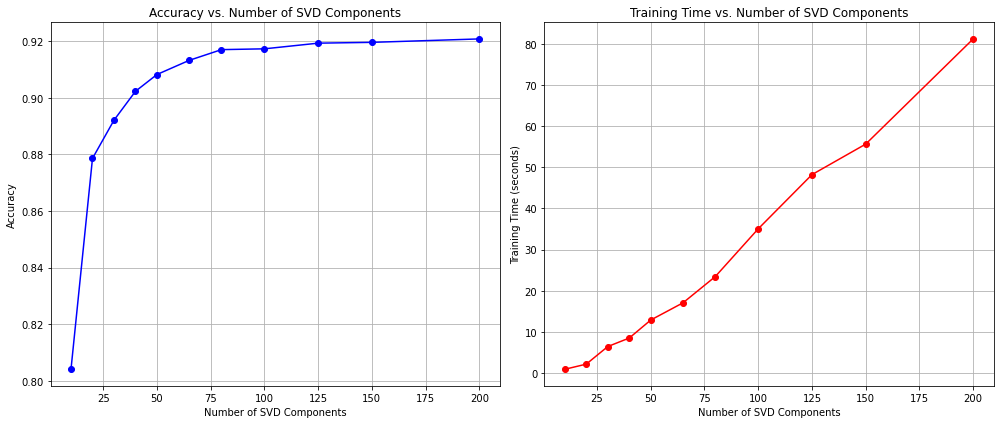

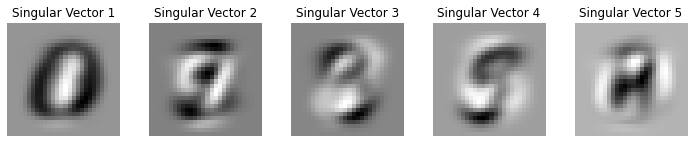

In [11]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

# 1. Plot Accuracy and Training Time vs. Number of Components
n_components = [result['n_components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training_time'] for result in results]

plt.figure(figsize=(14, 6))

# Subplot 1: Accuracy vs. SVD components
plt.subplot(1, 2, 1)
plt.plot(n_components, accuracies, marker='o', color='b')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Subplot 2: Training Time vs. SVD components
plt.subplot(1, 2, 2)
plt.plot(n_components, training_times, marker='o', color='r')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

# 2. Visualize the Top 5 Singular Vectors (Singular Components)
# Assuming `apply_svd_custom` stores the singular vectors somewhere,
# but here I assume you have access to `V_reduced` from the last call to SVD.

# Reshape and plot top 5 singular vectors as 28x28 images.
# In this case, I assume V_reduced is available from one of the SVD calls.

def visualize_singular_vectors(V_reduced, top_n=5):
    plt.figure(figsize=(10, 2))
    for i in range(top_n):
        singular_vector = V_reduced[:, i]  # Take the ith singular vector
        singular_vector_image = singular_vector.reshape(28, 28)  # Reshape to 28x28
        
        plt.subplot(1, top_n, i + 1)
        plt.imshow(singular_vector_image, cmap='gray')
        plt.title(f'Singular Vector {i + 1}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example call assuming V_reduced is available
visualize_singular_vectors(V_reduced, top_n=5)


## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

Based on the plots, we can see that the training time increases linearly as the number of SVD components increase. Also, the accuracy of the model increases as the number of SVD components increase, but plateaus at about 0.92. This is expected because SVD reduces the dimensionality of data, preserving only the most important features and leaving out the others, for the benefit of reducing computational costs. The inflection point for the accuracy vs number of components plot seems to be at about 50 components. Beyond that point, accuracy gains are minimal but training time increases significantly. Thus, 50 components seems optimal, offering strong accuracy while keeping training time relatively low.